<center> <h2><b>BID Assignment</b></h2></center>

### Name-Jayanta Ghosh
### Roll no-190112
### Seat No-1166

# Analysis of E-Commerce Women's Clothing Reviews

In this project, I want to practice Natural Language Processing (NLP), Supervised Machine Learning and Unsupervised Machine Learning. After some research on what dataset I could obtain from the web, I found a women clothings dataset of a real e-commerce business. I think it could be cool and useful to a business if I could develop an automation for the business to extract insights from their clothing reviews. Because it is not easy to read thousands of reviews and it is a time consuming task.

This could be valuable for various reasons. For example:
1) Understand trends: to understand what people are talking about, things they like or things they do not like about.

2) Improve your products from users feedbacks.

3) To follow up with your user about the product that they don’t like and further to understand the problem.

4) To decrease return rate, re-stocking fees is one of the big expenses for e-commerce to succeed or even stay alive.

## Problems that I want to solve
So for the purpose of this project, I want to explore the followings:

1) Topic Modeling: for example, what are the positive and negative things people are talking about that clothing/shoes. To see if I could find any topic by calculating frequencies of word or combination of words happen in a topic.

2) “Separation” of good and bad reviews using clustering: to separate out or find pattern of bad and good reviews for different products, so ones can send them to corresponding departments for attention by using clustering methods. This could be very hard since clustering method is an unsupervised machine learning technique that find hidden patterns from the data.

3) Rankings of various products of Women's clothes provided in E-Commerce Website Data.

## Project Design
1) Clean and perform Exploratory Data Analysis (EDA) on my data.

2) Vectorization of my cleaned text data (Count Vectorizer and TF-IDF).

3) Generate a WordCloud to see what are the most frequent words that people are talking about.

4) Perform Topic Modelings to see if I could find some clear different topics that people are talking about.

5) Use clustering methods to cluster out pattern from my text data and see if I could cluster out those bad reviews (or separate types of reviews). And use TSNE to visualize my clusters.

6) Perform a supervised learning problem with the Rating column from the dataset to classify good and bad reviews.

7) Achieved Rankings of Products provided in the dataset by E-Commerce by various lists.

## Data And Technologies I used
The dataset I used could be obtained from Kaggle data source https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews, consists of 23486 entires of different clothings reviews and 11 different columns.

The tools that I have used in this project are numpy, pandas, matplotlib, seaborn, wordcloud, sklearn especially with CountVectorizer, TfidfVectorizer, Kmeans, TSNE, NMF, TruncatedSVD, silhouette_score, MultinomialNB and LogisticRegression.


## Installing the required Packages

In [5]:
! pip install imblearn

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/a4/fd/0be730526bae8355cadbea1c9e1cfbbfe5a92347f6937ea4474c467c04d1/wordcloud-1.8.1-cp36-cp36m-win_amd64.whl


You are using pip version 9.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Importing Required Libraries

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE

# Data Description
The dataset is obtained from Kaggle (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body. The company name is replaced by te word 'retailer'.
- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

### To-do list for Data Analysis
- load dataset
- EDA
- Preform cleanings

# Load the dataset


In [142]:
# load the dataset.
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

## Exploratory Data Analysis

In [143]:
# list of column names.
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [144]:
# there are 23486 rows and 11 columns.
df.shape

(23486, 11)

In [145]:
# take out the 'Unnamed: 0' and 'Clothing ID' column.
# don't think they will be useful for my analysis.
df = df.drop(['Unnamed: 0', 'Clothing ID'], axis=1)

# clean the white space from the column names.
df = df.rename(columns=lambda x: x.replace(' ', ''))

In [146]:
# there are NaN in Title, ReviewText, DivisionName, DepartmentName, ClassName column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    23486 non-null  int64 
 1   Title                  19676 non-null  object
 2   ReviewText             22641 non-null  object
 3   Rating                 23486 non-null  int64 
 4   RecommendedIND         23486 non-null  int64 
 5   PositiveFeedbackCount  23486 non-null  int64 
 6   DivisionName           23472 non-null  object
 7   DepartmentName         23472 non-null  object
 8   ClassName              23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


### How many NAs we have?
Columns Name  | Amount of NAs | % of dataset | 
------------- | ------------- | -------------|
Title  | 3810  | ~16% | 
ReviewText  | 845  | ~3.5% | 
DivisionName  | 14  | ~0.05% | 
DepartmentName  | 14  | ~0.05% | 
ClassName  | 14  | ~0.05% | 

- Those NAs in **DivisionName**, **DepartmentName** and **ClassName** are the same, since there are only ~0.05% of those, I will drop them.
- For **ReviewText**, since we are preforming our NLP on that column primarily, we can't preform NLP if we don't have any text to analyze, so I will drop them.
- For **Title**, since it is text and I am doing NLP, eventually I probabily will need to prefrom NLP on that column and combine with the ReviewText column to see if there is any meaningful unsupervised learning results. There are 3810 (~16% of my whole dataset) NAs and I don't really want to drop all of them. So my solution is to create a new column called CombineText, which comebine the Title and ReviewText column together and makes the Title like the first sentense of the review.

### Clean the NAs

In [147]:
# dropping NAs for 4 columns.
subset = ['ReviewText', 'DivisionName', 'DepartmentName', 'ClassName']
df = df.dropna(subset=subset)

print('Now length of df is: ', len(df))

Now length of df is:  22628


ReviewText column will be my primary column for NLP.

In [148]:
# first fill NAs in the Title column with space, so I can concatenate the Title and ReviewText column together.
df.Title.fillna('', inplace=True)

# create a new column named CombinedText with Title and ReviewText.
df['CombinedText'] = df.Title + ' ' + df.ReviewText

# drop the Title column.
df.drop('Title', axis=1, inplace=True)

Beside the ReviewText column, I created another column called CombinedText, which is joining the Title and ReviewText column together. Because I think there could be some hidden data you can get from the review title as well.

In [149]:
# general stats for the 4 numeric columns.
df.describe()

Age        Rating  RecommendedIND  PositiveFeedbackCount
count  22628.000000  22628.000000    22628.000000           22628.000000
mean      43.282880      4.183092        0.818764               2.631784
std       12.328176      1.115911        0.385222               5.787520
min       18.000000      1.000000        0.000000               0.000000
25%       34.000000      4.000000        1.000000               0.000000
50%       41.000000      5.000000        1.000000               1.000000
75%       52.000000      5.000000        1.000000               3.000000
max       99.000000      5.000000        1.000000             122.000000

In [150]:
# there is no more NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    22628 non-null  int64 
 1   ReviewText             22628 non-null  object
 2   Rating                 22628 non-null  int64 
 3   RecommendedIND         22628 non-null  int64 
 4   PositiveFeedbackCount  22628 non-null  int64 
 5   DivisionName           22628 non-null  object
 6   DepartmentName         22628 non-null  object
 7   ClassName              22628 non-null  object
 8   CombinedText           22628 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.7+ MB


### Export as Pickle

In [151]:
df.to_pickle('cleaned_df.pkl')

Lastly I pickle my cleaned data for further usage.

## Wordcloud Execution for Data

Next thing I do is to create a WordCloud to see what words people are talking/using the most. Before I do that, I need to:

### Reading the cleaned data from EDA

In [152]:
df = pd.read_pickle('cleaned_df.pkl')
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  
0  Intimates   Absolutely wonderful - silky and sexy and com...  
1    Dresses   Love this dress!  it's sooo pretty.  i happen...  
2    Dresses  Some major design flaws I had such high hopes ...  
3      Pants  My favorite buy! I love, love, love this jumps...  
4    Blouses  Flattering shirt This shirt is very flattering...

## Clean it a little bit more

Remove some of the less useful frequent words that could exist in the reviews, such as dress, dresses and etc.

In [153]:
words_to_remove = ['love', 'dress', 'dresses']
text = 'I love things about dresses but not dress.'

import re
pattern = [f'(\\b{word}\\b)' for word in words_to_remove]
pattern = '|'.join(pattern)
re.sub(pattern, '', text)

'I  things about  but not .'

modify my texts into all lower case

In [154]:
df['ReviewTextLower'] = df.ReviewText

In [155]:
df['ReviewTextLower'] = df.ReviewTextLower.str.lower()

In [156]:
df['ReviewTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

## Vectorizer the text data

Then vectorize the text data by using Count and TF-IDF vectorizer.

In [157]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

the code is basically saying vectorize the text into 1-gram and 2-gram (also tried with 3-gram), using the pre-set ‘english’ stop words from the package, everything and pattern is in lower case, ignores words that has a frequency of higher than 0.6 from the documents, with a maximum of 4000 features/dimensions.

## Create the word cloud

Then I use the following code to create a WordCloud:

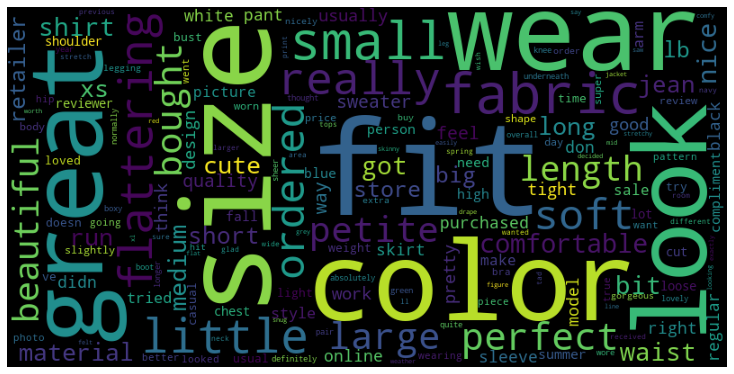

In [158]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

## Topic Modelings

There is one more step before I can do topic modeling, which is to use LSA and NMF to reduce the dimension of my input text data.

In [159]:
# def functions for topic modelings
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def display_topics2(model, feature_names, no_top_words=10, topic_names = None):
    for index, topic in enumerate(model.components_):
        if not topic_names or not topic_names[index]:
            print(f"\nTopic {index}")
        else:
            print(f"\nTopic {topic_names[index]}:")
        msg = ", ".join([f'{feature_names[i]} ({topic[i]:6.4f})' 
                             for i in topic.argsort()[:-no_top_words-1:-1]])
        print(msg)

In [160]:
# try using 50 dimensions
n_comp = 50
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [161]:
# topic modeling with lsa and tfidf
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),8)


Topic 0
size (0.2144), fit (0.1781), like (0.1731), great (0.1686), wear (0.1614), just (0.1463), small (0.1424), fabric (0.1303)

Topic 1
great (0.3615), jeans (0.1977), comfortable (0.1872), soft (0.1419), sweater (0.1143), looks (0.1135), perfect (0.1063), shirt (0.1033)

Topic 2
size (0.4032), true (0.2697), true size (0.2672), great (0.2154), fits (0.1633), perfect (0.1368), wear (0.1168), comfortable (0.1065)

Topic 3
small (0.3689), shirt (0.2601), wear (0.2385), medium (0.2324), large (0.2092), cute (0.1412), runs (0.1403), usually (0.1279)

Topic 4
shirt (0.5399), true (0.2559), true size (0.2545), cute (0.2065), size (0.1805), fits (0.1316), fits true (0.1172), runs (0.0976)

Topic 5
sweater (0.5852), beautiful (0.2066), color (0.1938), soft (0.1258), warm (0.0946), fits (0.0896), sleeves (0.0763), coat (0.0734)

Topic 6
great (0.6021), looks (0.2674), looks great (0.1960), small (0.1404), quality (0.1275), sweater (0.1144), look (0.0907), large (0.0881)

Topic 7
sweater (0.

In [162]:
# topic modeling with lsa and countvectorizer
display_topics2(lsa_cv, count_vectorizer.get_feature_names(),10)


Topic 0
size (0.3564), fit (0.2672), like (0.2597), wear (0.2188), just (0.1981), great (0.1858), small (0.1774), fabric (0.1562), color (0.1482), ordered (0.1378)

Topic 1
size (0.7713), small (0.1353), true (0.1065), true size (0.1034), fit (0.0912), ordered (0.0895), size small (0.0494), large (0.0436), usual (0.0428), runs (0.0416)

Topic 2
like (0.6536), size (0.1369), look (0.1038), really (0.0916), just (0.0752), looked (0.0572), model (0.0542), fabric (0.0524), look like (0.0498), didn (0.0477)

Topic 3
wear (0.5252), small (0.4081), medium (0.1478), usually (0.1055), large (0.1009), runs (0.0783), usually wear (0.0764), shirt (0.0685), fits (0.0608), retailer (0.0528)

Topic 4
fit (0.5434), small (0.4347), medium (0.1521), ordered (0.1254), just (0.1086), xs (0.0929), large (0.0861), usually (0.0784), petite (0.0710), waist (0.0583)

Topic 5
just (0.6473), fabric (0.1600), color (0.1106), beautiful (0.1024), right (0.1016), really (0.0914), flattering (0.0715), soft (0.0674),

In [163]:
# topic modeling with nmf and tfidf
display_topics2(nmf_tfidf, tfidf_vectorizer.get_feature_names(),10)


Topic 0
fabric (12.7493), soft (2.0676), fabric soft (2.0094), design (0.8667), fabric nice (0.8468), soft fabric (0.8302), heavy (0.7223), light (0.7198), quality fabric (0.6972), style (0.6456)

Topic 1
wear (9.3299), usually wear (1.6612), wait (1.4259), easy (1.3125), wait wear (1.2325), usually (1.1733), easy wear (1.0562), normally wear (0.8768), wear size (0.8420), normally (0.6644)

Topic 2
true (3.4824), true size (3.3670), size (1.8984), fits true (1.1880), fit true (0.7309), runs true (0.5530), runs (0.2810), fits (0.2754), run true (0.2161), size great (0.1502)

Topic 3
small (4.7533), medium (1.7486), size small (0.7176), small medium (0.6751), runs small (0.5592), extra (0.5503), extra small (0.5392), usually (0.5303), wear small (0.4475), small fit (0.4302)

Topic 4
shirt (4.8714), great shirt (0.2303), shirts (0.2253), like shirt (0.1970), cute shirt (0.1948), boxy (0.1866), bought shirt (0.1814), shirt runs (0.1737), shirt great (0.1732), shirt fits (0.1713)

Topic 5


In [164]:
# topic modeling with nmf and countvectorizer
display_topics2(nmf_cv, count_vectorizer.get_feature_names(),10)


Topic 0
great (34.8864), looks great (2.3692), fit great (1.6852), fall (1.4489), look great (1.3142), summer (1.2223), fits great (1.1079), great fit (1.0296), great quality (0.9590), piece (0.9496)

Topic 1
size (9.2205), usual (0.5581), usual size (0.4689), smaller (0.4022), size small (0.3911), normal (0.3695), wear size (0.3604), size fit (0.3303), normal size (0.3255), ordered size (0.3177)

Topic 2
like (8.0721), feel (0.5839), feel like (0.4267), looked (0.3568), look like (0.3406), looked like (0.2860), model (0.2844), felt (0.2619), looks like (0.2596), really like (0.2455)

Topic 3
wear (11.3353), usually wear (1.0138), usually (0.7694), wait (0.5115), wear size (0.4973), normally wear (0.4959), easy (0.4451), bra (0.4299), wait wear (0.4191), underneath (0.4191)

Topic 4
fit (12.3894), fit perfectly (1.0444), perfectly (1.0345), size fit (0.5042), fit great (0.4127), better (0.3945), loose (0.3825), fit like (0.3422), fit perfect (0.3185), small fit (0.3079)

Topic 5
just 

We can generate different amount of topics, by testing with different numbers of topics to find the best number, and see if those topics make sense to you.

## Clustering of Reviews

## Standard Scaled: Non-Negative Matrix Factorization - Term Frequency–InverseDocument Frequency

### 2-grams Tokenization

In [165]:
# initialize vectorizers
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

# transfomred my text data using vectorizers
cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

In [166]:
# initialized reducers with dimensions
n_comp = 5
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

# transformed my vectorizers data using reducers
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

It is better to standardize your input data to mean of 0 and standard deviation of 1 before you run clustering algorithms. Because your features might not all be on the same scale, on the other words, that might not be the same thing as increasing 1 unit from feature a comparing to increasing 1 unit from feature b.

In [167]:
# initialize standardscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
lsa_cv_data_sclaed = SS.fit_transform(lsa_cv_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)
nmf_cv_data_scaled = SS.fit_transform(nmf_cv_data)

In [168]:
display_topics2(lsa_tfidf, tfidf_vectorizer.get_feature_names(),8)


Topic 0
size (0.2144), fit (0.1781), like (0.1731), great (0.1686), wear (0.1614), just (0.1463), small (0.1424), fabric (0.1303)

Topic 1
great (0.3693), jeans (0.1888), comfortable (0.1876), soft (0.1465), sweater (0.1139), looks (0.1134), perfect (0.1063), shirt (0.1027)

Topic 2
size (0.4030), true (0.2633), true size (0.2608), great (0.1954), fits (0.1628), perfect (0.1355), wear (0.1227), jeans (0.1209)

Topic 3
small (0.3684), medium (0.2491), shirt (0.2457), wear (0.2436), large (0.2203), runs (0.1332), usually (0.1268), cute (0.1143)

Topic 4
shirt (0.5071), true (0.2406), true size (0.2380), cute (0.1987), size (0.1415), fits (0.1320), fits true (0.1130), nice (0.1016)


Then you can use unsupervised machine learning algorithm to make clusters for different topics or different types of reviews. In this project, I used KMeans, and also used inertia and silhouette scores as proxy to help me identify what is the best number of clusters I should use. Then using TSNE to help me visualize the clusters generated.

In [169]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(lsa_tfidf_data_sclaed)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(lsa_tfidf_data_sclaed, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

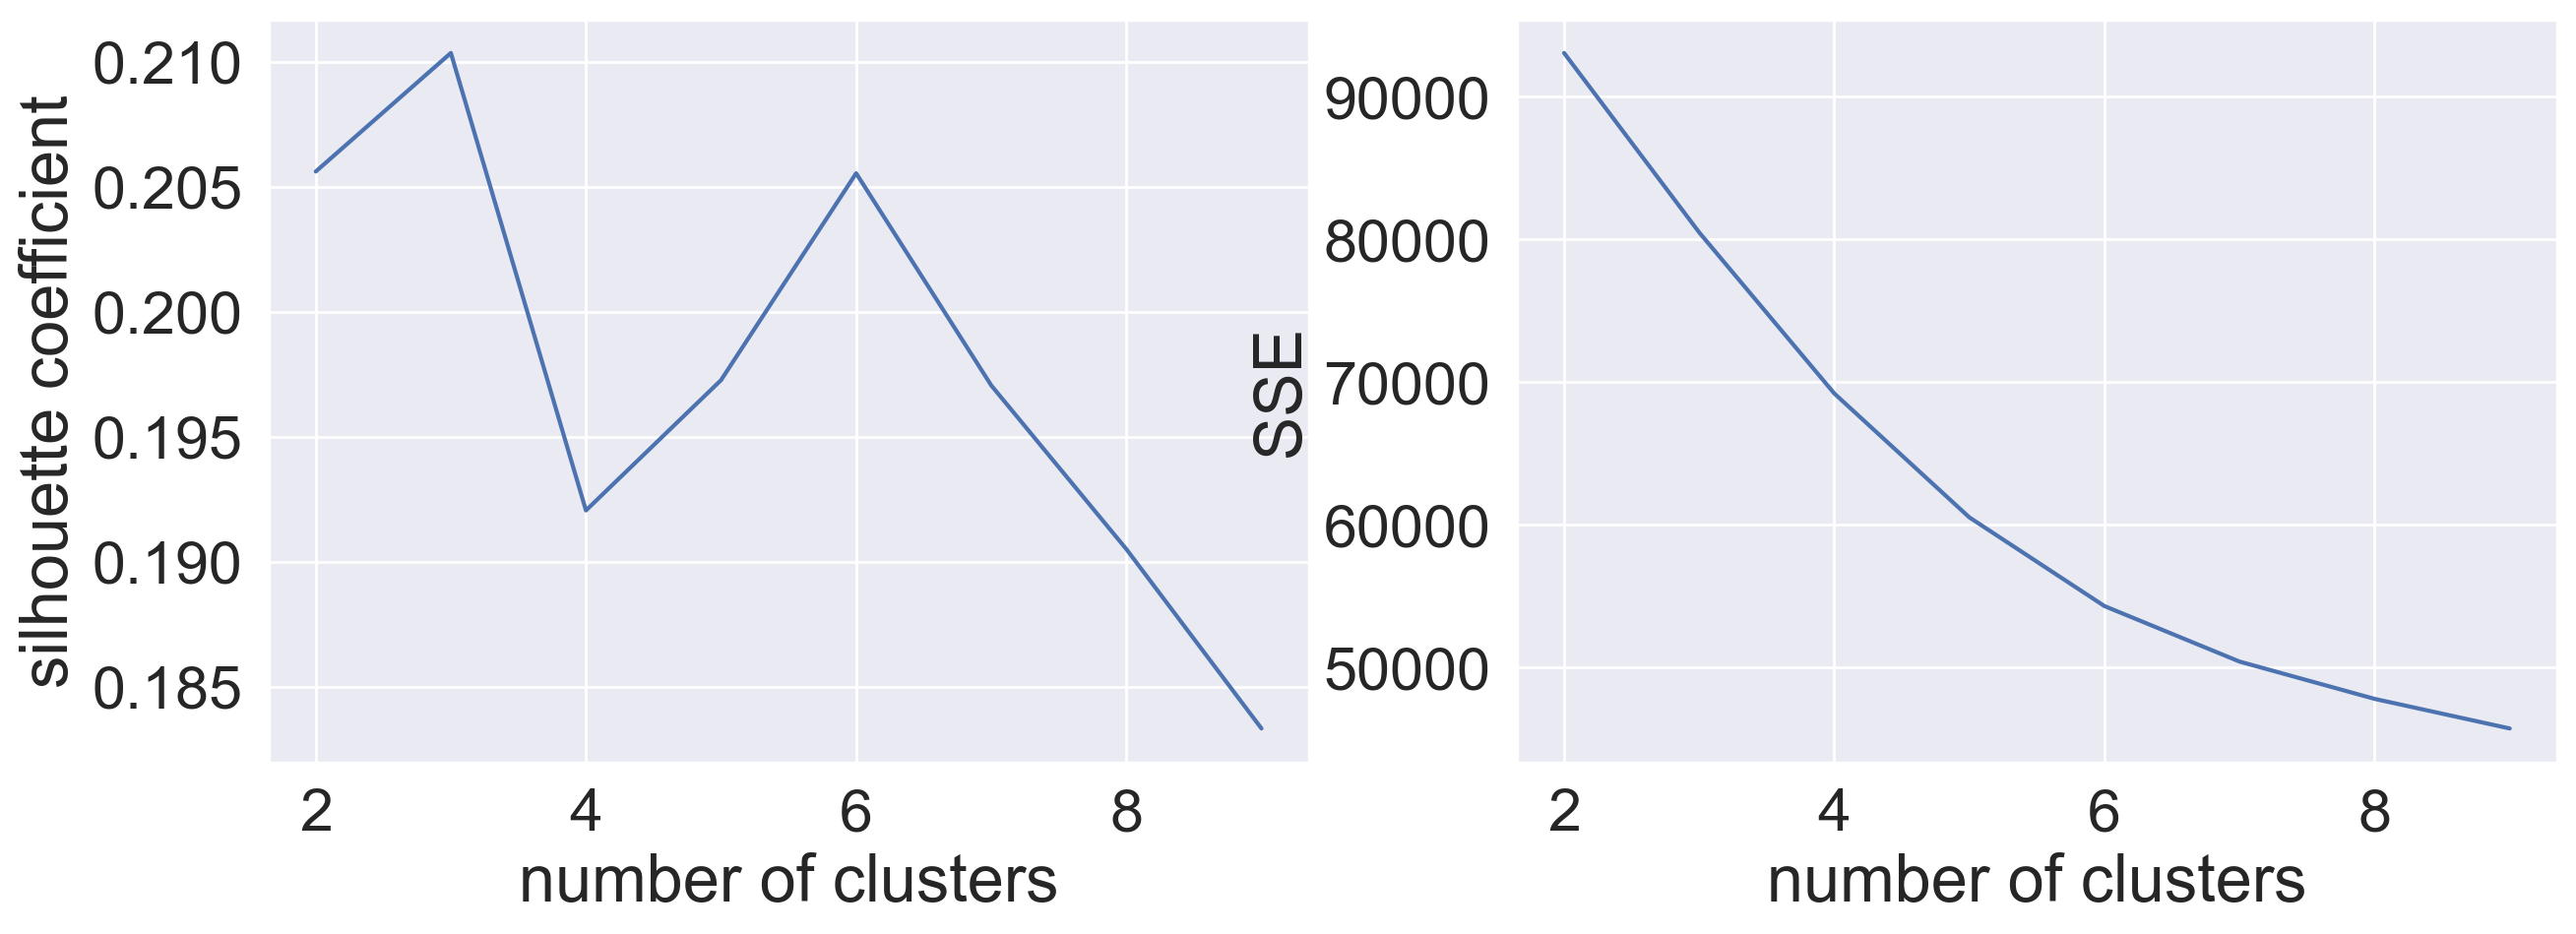

In [170]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [171]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(lsa_tfidf_data_sclaed)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 93058.838693
# clusters:  3   Inertia: 80489.830025
# clusters:  4   Inertia: 69210.680182
# clusters:  5   Inertia: 60528.570877
# clusters:  6   Inertia: 54316.137949
# clusters:  7   Inertia: 50427.318115
# clusters:  8   Inertia: 47815.051992
# clusters:  9   Inertia: 45741.110852
# clusters: 10   Inertia: 43909.446494
# clusters: 11   Inertia: 42235.203859
# clusters: 12   Inertia: 40827.591612
# clusters: 13   Inertia: 39526.793406
# clusters: 14   Inertia: 38378.705178
# clusters: 15   Inertia: 37261.677344
# clusters: 16   Inertia: 36305.716985
# clusters: 17   Inertia: 35390.446504
# clusters: 18   Inertia: 34588.347502
# clusters: 19   Inertia: 33859.839891
# clusters: 20   Inertia: 33182.991687
# clusters: 21   Inertia: 32565.996098
# clusters: 22   Inertia: 31940.361807
# clusters: 23   Inertia: 31419.387674
# clusters: 24   Inertia: 30991.782242


Text(0, 0.5, 'inertia scores')

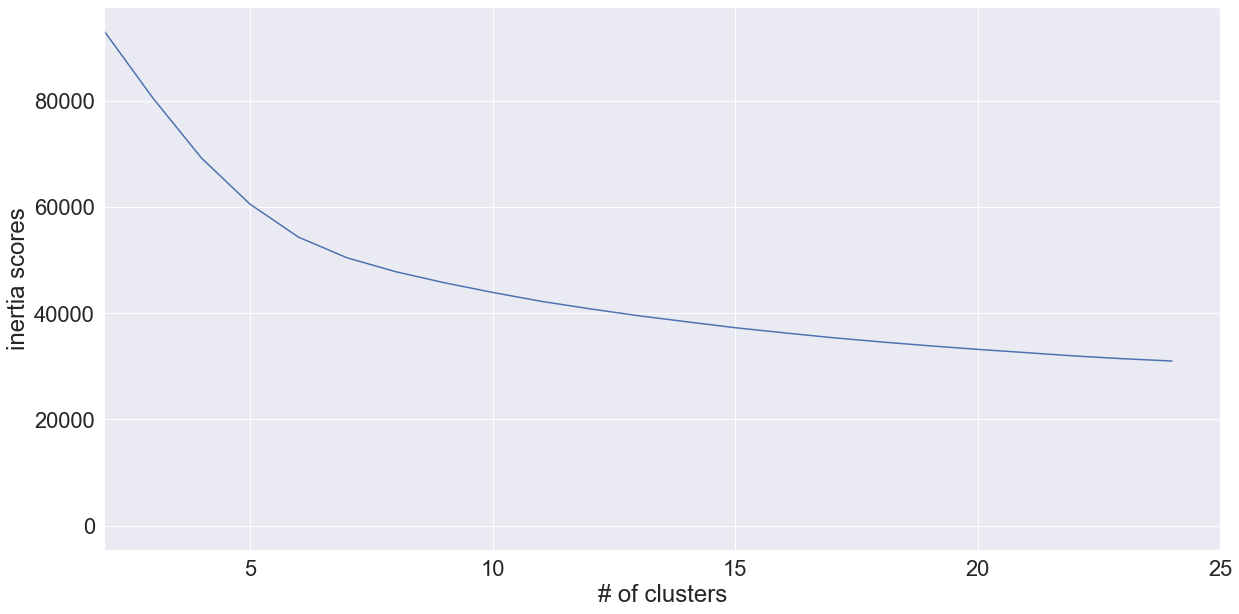

In [172]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [173]:
# running cluster
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(lsa_tfidf_data_sclaed)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['able try', 'absolutely', 'absolute', 'able wear', 'able']
cluster1:
['able wear', 'absolutely', 'able', 'able try', 'absolute']
cluster2:
['able', 'absolute', 'able wear', 'absolutely', 'able try']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.028s...
[t-SNE] Computed neighbors for 20628 samples in 2.682s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

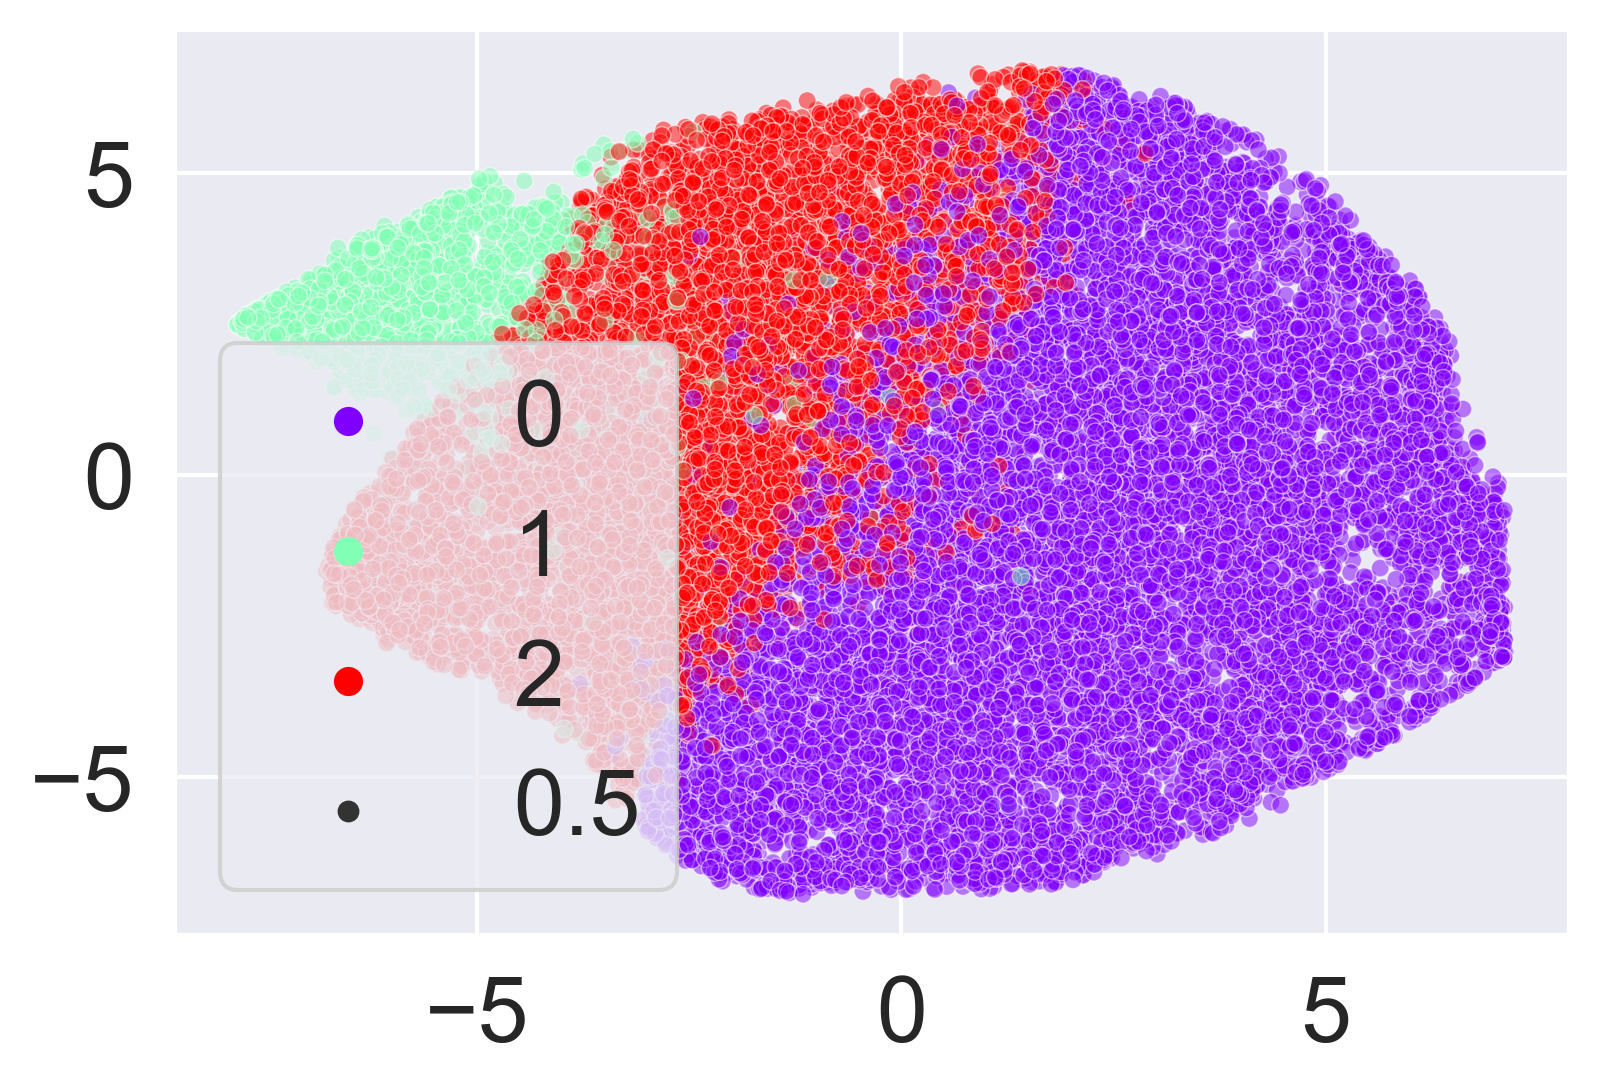

In [174]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(lsa_tfidf_data_sclaed[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [175]:
for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['able try', 'absolutely', 'absolute', 'able wear', 'able']
cluster1:
['able wear', 'absolutely', 'able', 'able try', 'absolute']
cluster2:
['able', 'absolute', 'able wear', 'absolutely', 'able try']


In [176]:
kmeans.labels_

array([0, 2, 2, ..., 0, 2, 0])

In [177]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

0 Absolutely wonderful - silky and sexy and comfortable


3 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


4 This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


6 I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.


11 This dress is perfection! so pretty and flattering.




In [178]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==1]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

21 I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb


26 I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat. the sleeves are very wide (although long). as a light weight fall coat the sleeves don't need to be as wide because you wouldn't be layerng too much underneath. the buttons need to be moved at least three inches in for a nicer fit. i thought about redoing the buttons myself but the sleeves looked even more out of proportion wi

In [179]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==2]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

1 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


2 I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c


5 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but i

# nmf_tfidf

In [180]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(nmf_tfidf_data_scaled)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(nmf_tfidf_data_scaled, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

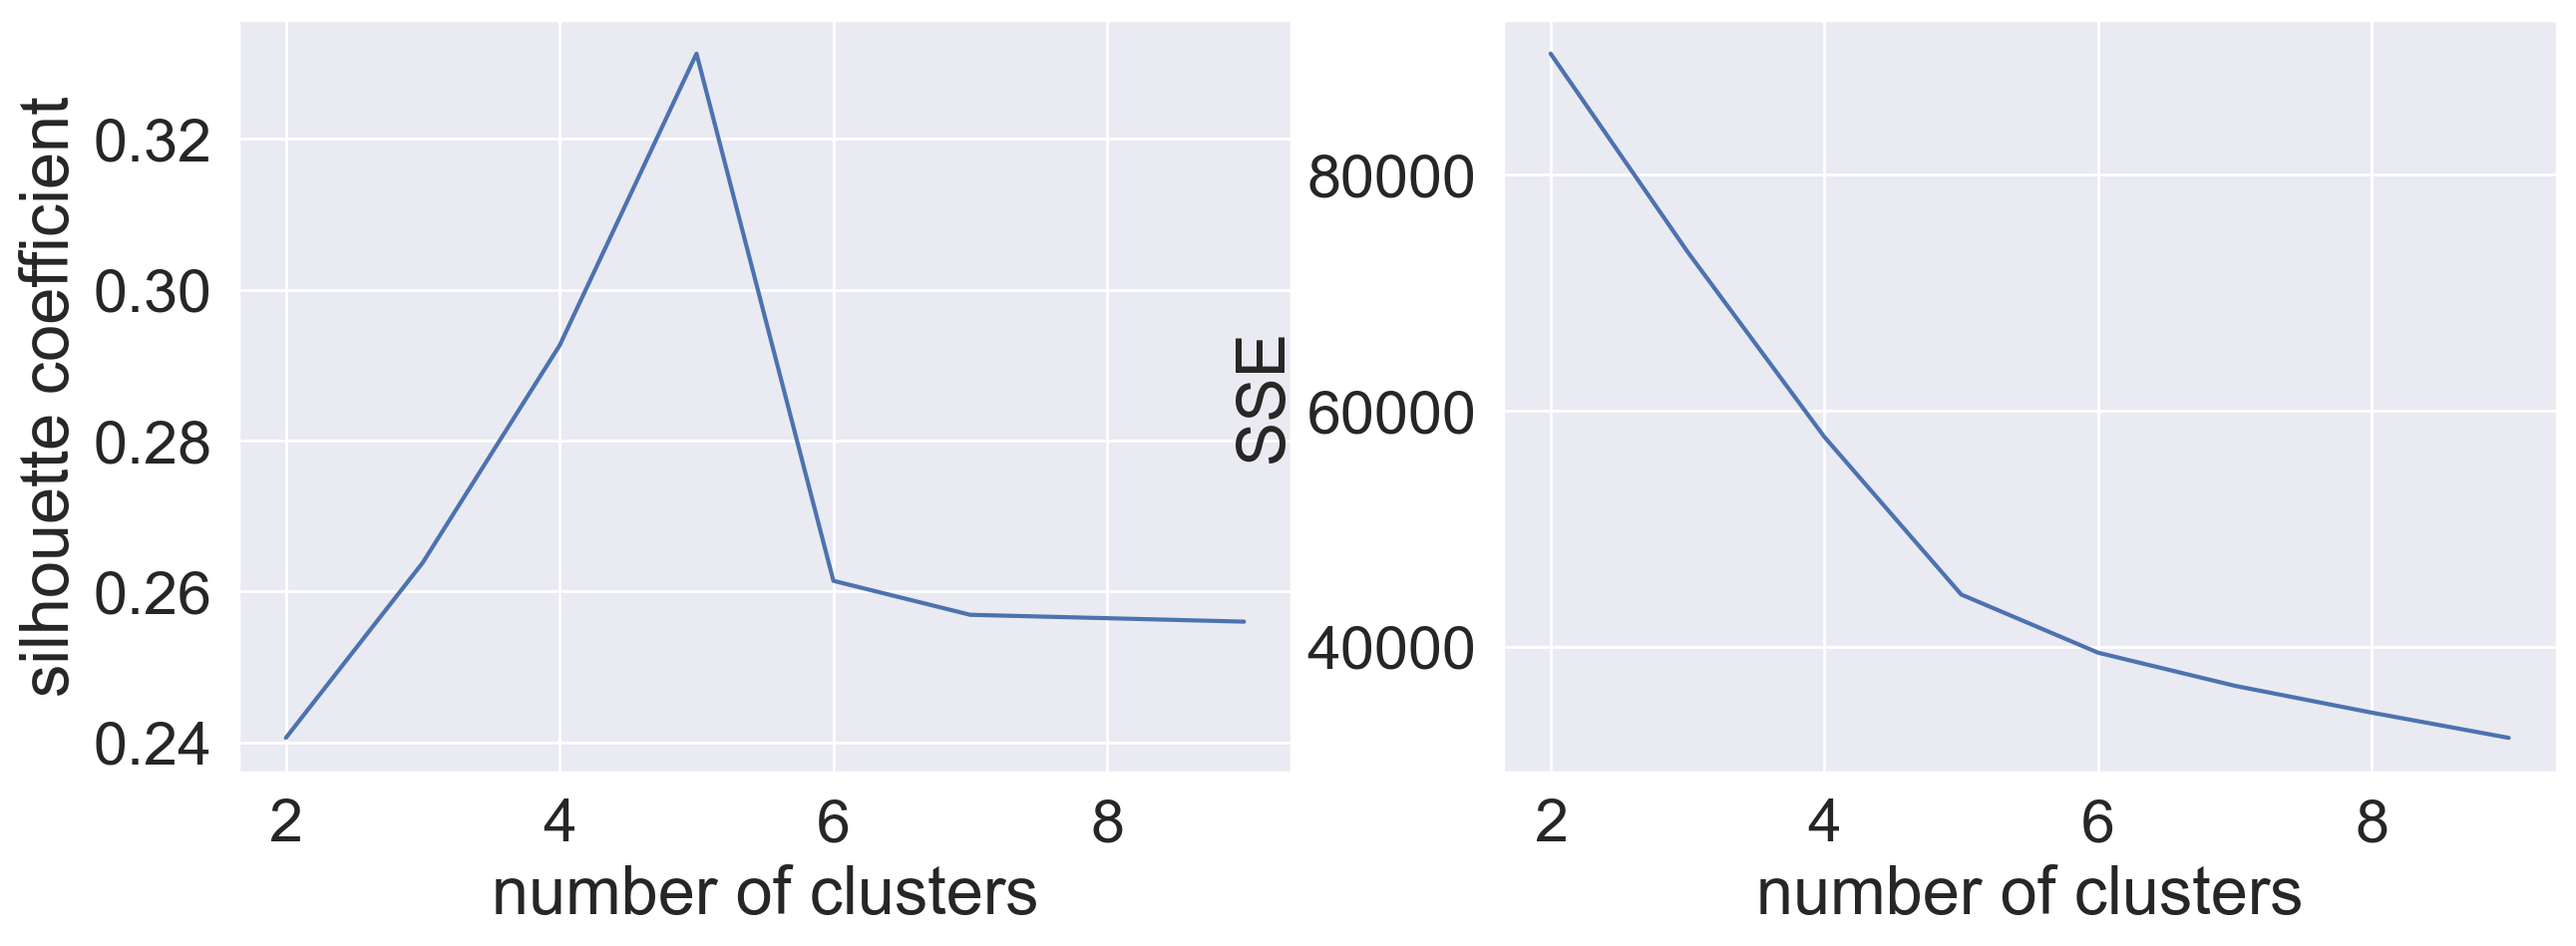

In [181]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [182]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(nmf_tfidf_data_scaled)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 90278.007152
# clusters:  3   Inertia: 73474.534328
# clusters:  4   Inertia: 57776.866415
# clusters:  5   Inertia: 44419.244381
# clusters:  6   Inertia: 39489.609679
# clusters:  7   Inertia: 36680.706907
# clusters:  8   Inertia: 34407.798455
# clusters:  9   Inertia: 32272.817235
# clusters: 10   Inertia: 30678.677221
# clusters: 11   Inertia: 28802.094071
# clusters: 12   Inertia: 27241.494322
# clusters: 13   Inertia: 26149.893723
# clusters: 14   Inertia: 25086.664870
# clusters: 15   Inertia: 24025.871301
# clusters: 16   Inertia: 23134.714888
# clusters: 17   Inertia: 22433.028289
# clusters: 18   Inertia: 21843.331034
# clusters: 19   Inertia: 21217.445415
# clusters: 20   Inertia: 20643.078988
# clusters: 21   Inertia: 20144.198020
# clusters: 22   Inertia: 19619.974591
# clusters: 23   Inertia: 19054.747033
# clusters: 24   Inertia: 18567.503157


Text(0, 0.5, 'inertia scores')

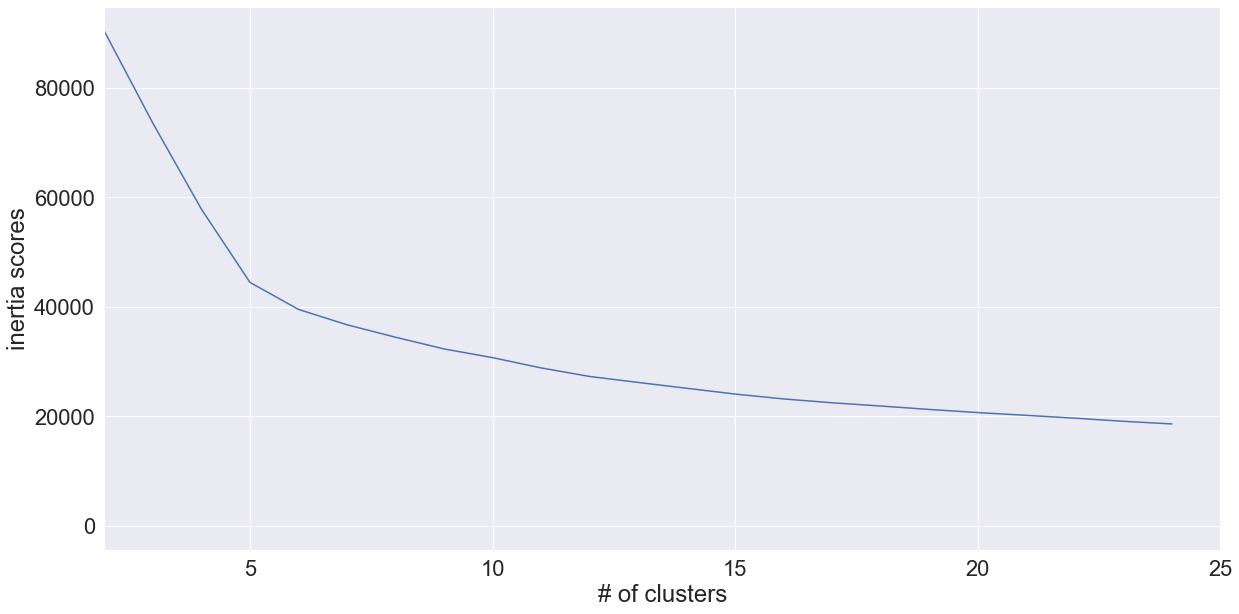

In [183]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [184]:
# running cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster1:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster2:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster3:
['able', 'absolutely', 'able wear', 'absolute', 'able try']
cluster4:
['able wear', 'absolutely', 'able try', 'absolute', 'able']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.105s...
[t-SNE] Computed neighbors for 20628 samples in 2.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

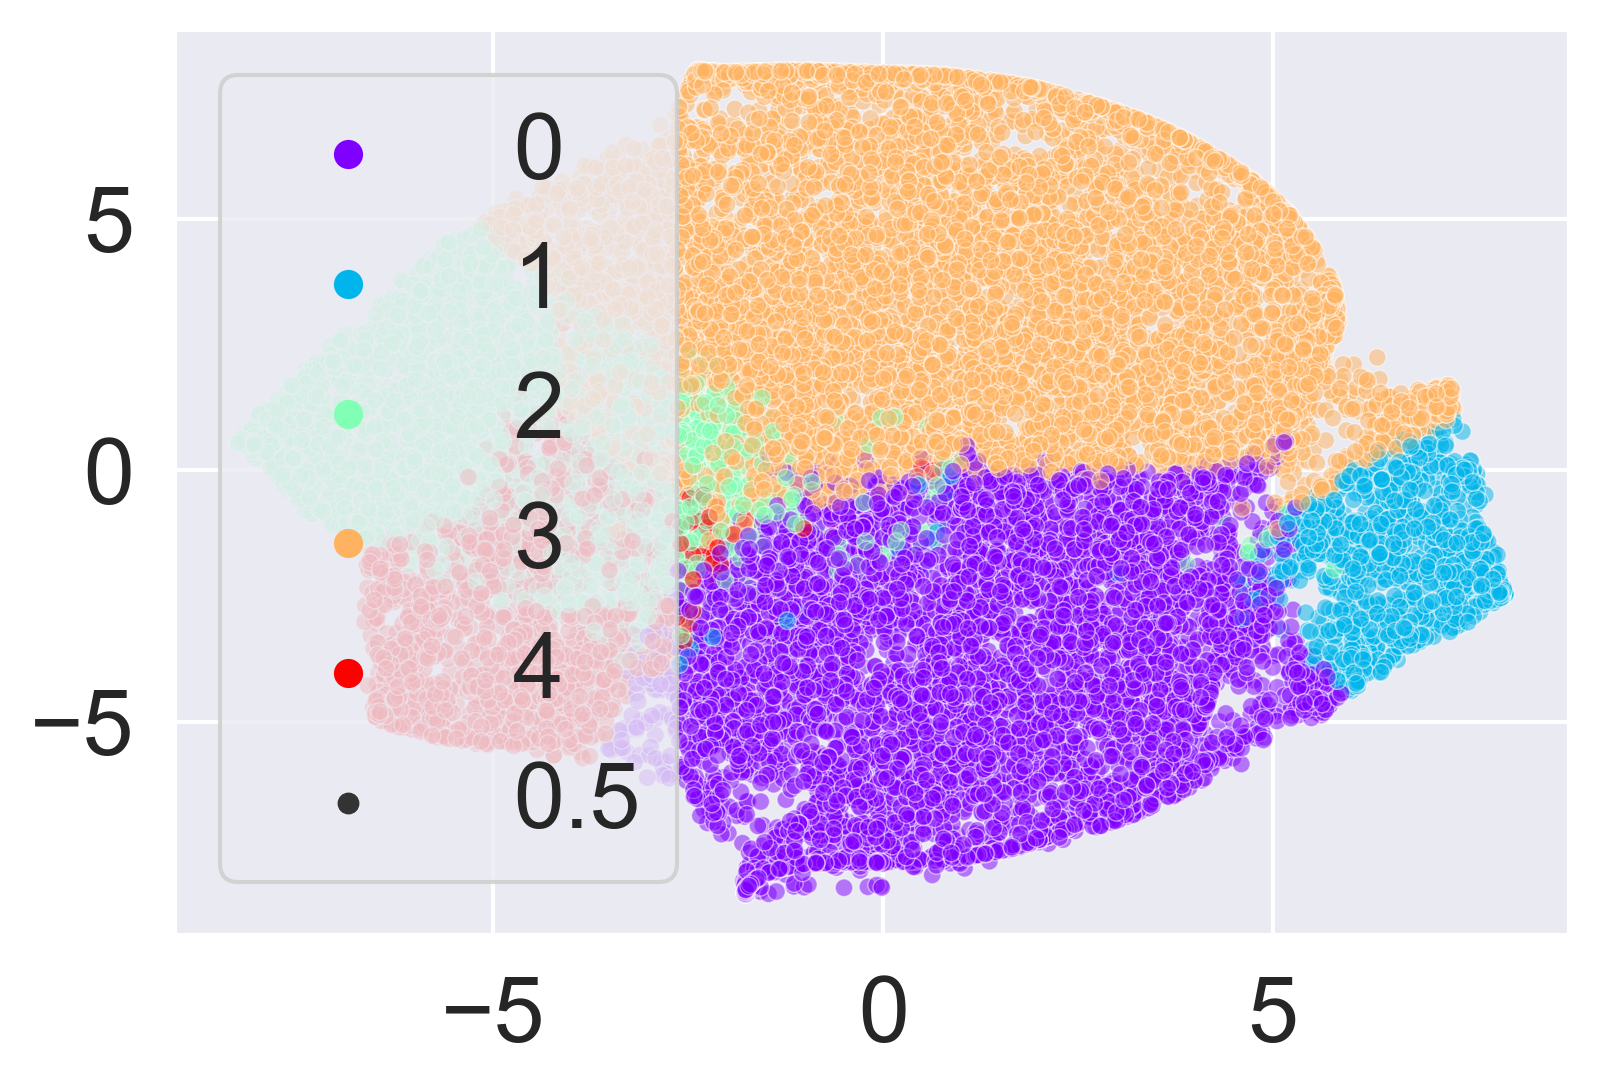

In [185]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [186]:
# running cluster
k = 6
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster1:
['able try', 'able', 'absolutely', 'able wear', 'absolute']
cluster2:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster3:
['able wear', 'absolutely', 'able try', 'absolute', 'able']
cluster4:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster5:
['able', 'absolutely', 'able wear', 'absolute', 'able try']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.105s...
[t-SNE] Computed neighbors for 20628 samples in 2.543s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

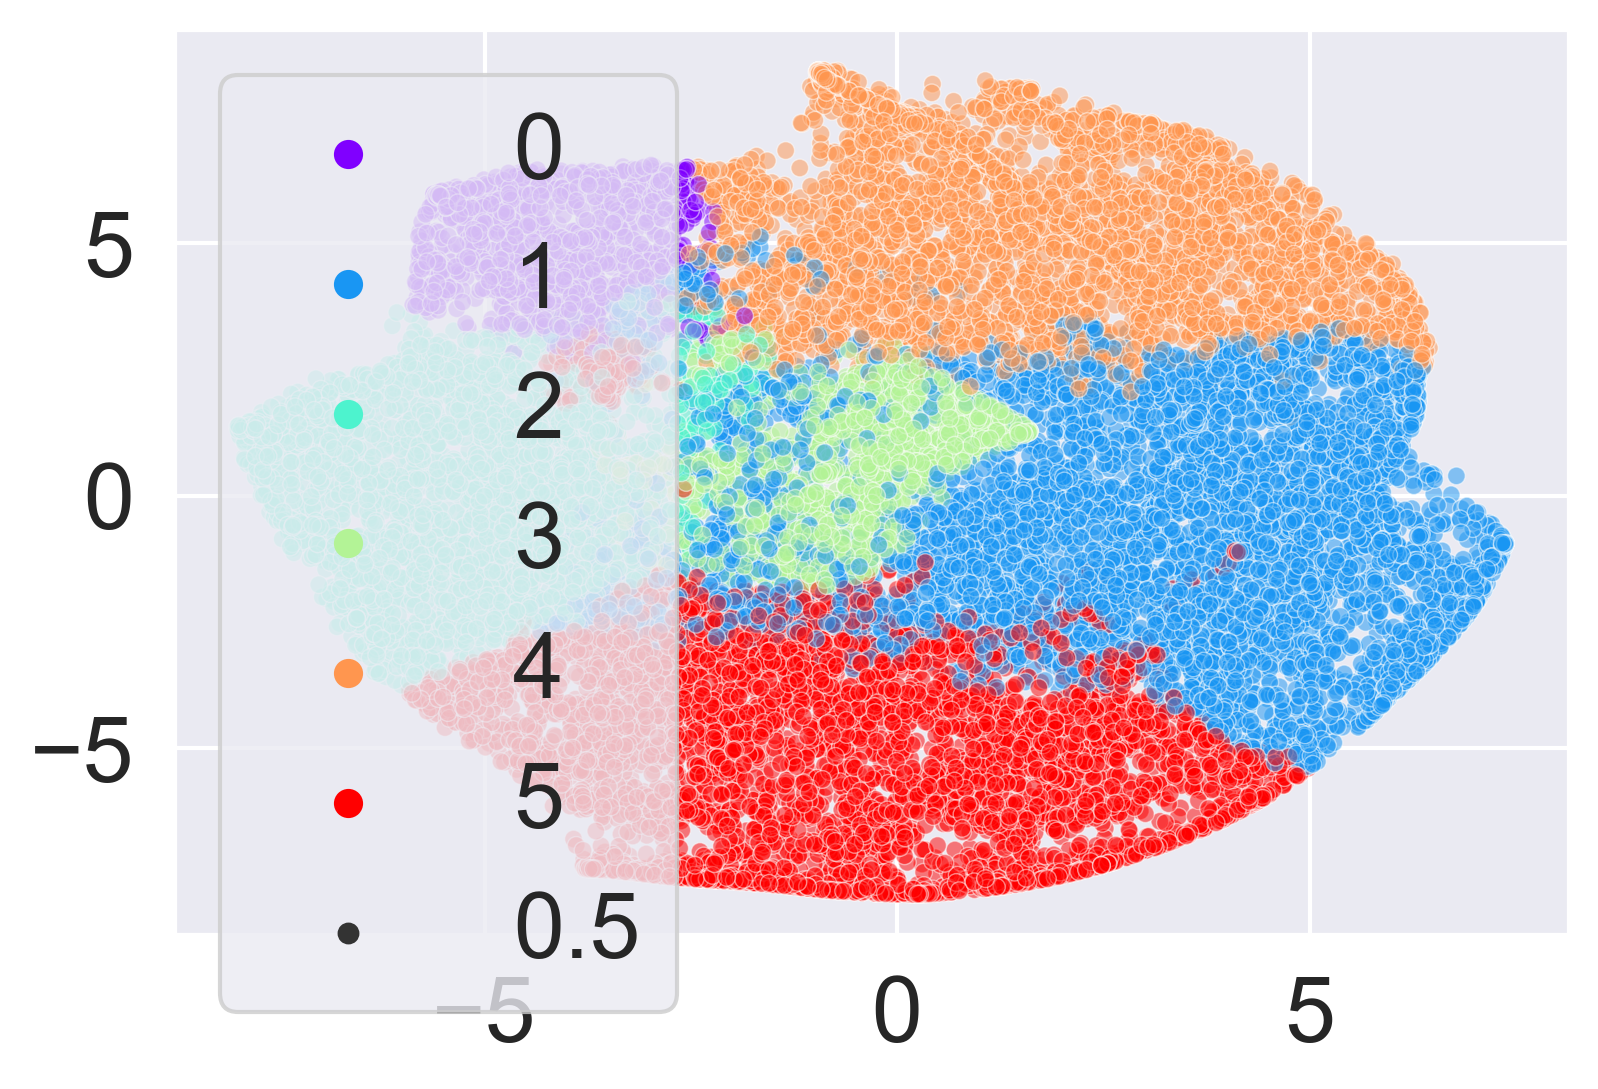

In [187]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [188]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==3]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

21 I'm upset because for the price of the dress, i thought it was embroidered! no, that is a print on the fabric. i think i cried a little when i opened the box. it is still ver pretty. i would say it is true to size, it is a tad bit big on me, but i am very tiny, but i can still get away with it. the color is vibrant. the style is unique. skirt portion is pretty poofy. i keep going back and forth on it mainly because of the price, although the quality is definitely there. except i wish it were emb


41 This is a beautiful top. it's unique and not so ordinary. i bought my usual medium and i found that it fits tight across my chest. although i had a baby this year and i am nursing, so that could be why. if i bought again i would size up.


91 This top is so much prettier in real life than it is on the model. the pattern and texture are both lovely, and the peplum is surprisingly flattering. it is definitely on the short side, but i think that gives it a modern look. the fabric does not 

## 3-grams Tokenization

In [189]:
# initialize vectorizers
count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

# transfomred my text data using vectorizers
cv_data = count_vectorizer.fit_transform(df.ReviewTextLower)
tfidf_data = tfidf_vectorizer.fit_transform(df.ReviewTextLower)

In [190]:
# initialized reducers with dimensions
n_comp = 5
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_tfidf = NMF(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

# transformed my vectorizers data using reducers
lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_tfidf_data = nmf_tfidf.fit_transform(tfidf_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [191]:
# initialize standardscaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

# transform my reducer data using standardscaler
lsa_tfidf_data_sclaed = SS.fit_transform(lsa_tfidf_data)
lsa_cv_data_sclaed = SS.fit_transform(lsa_cv_data)
nmf_tfidf_data_scaled = SS.fit_transform(nmf_tfidf_data)
nmf_cv_data_scaled = SS.fit_transform(nmf_cv_data)

In [192]:
SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(nmf_tfidf_data_scaled)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(nmf_tfidf_data_scaled, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

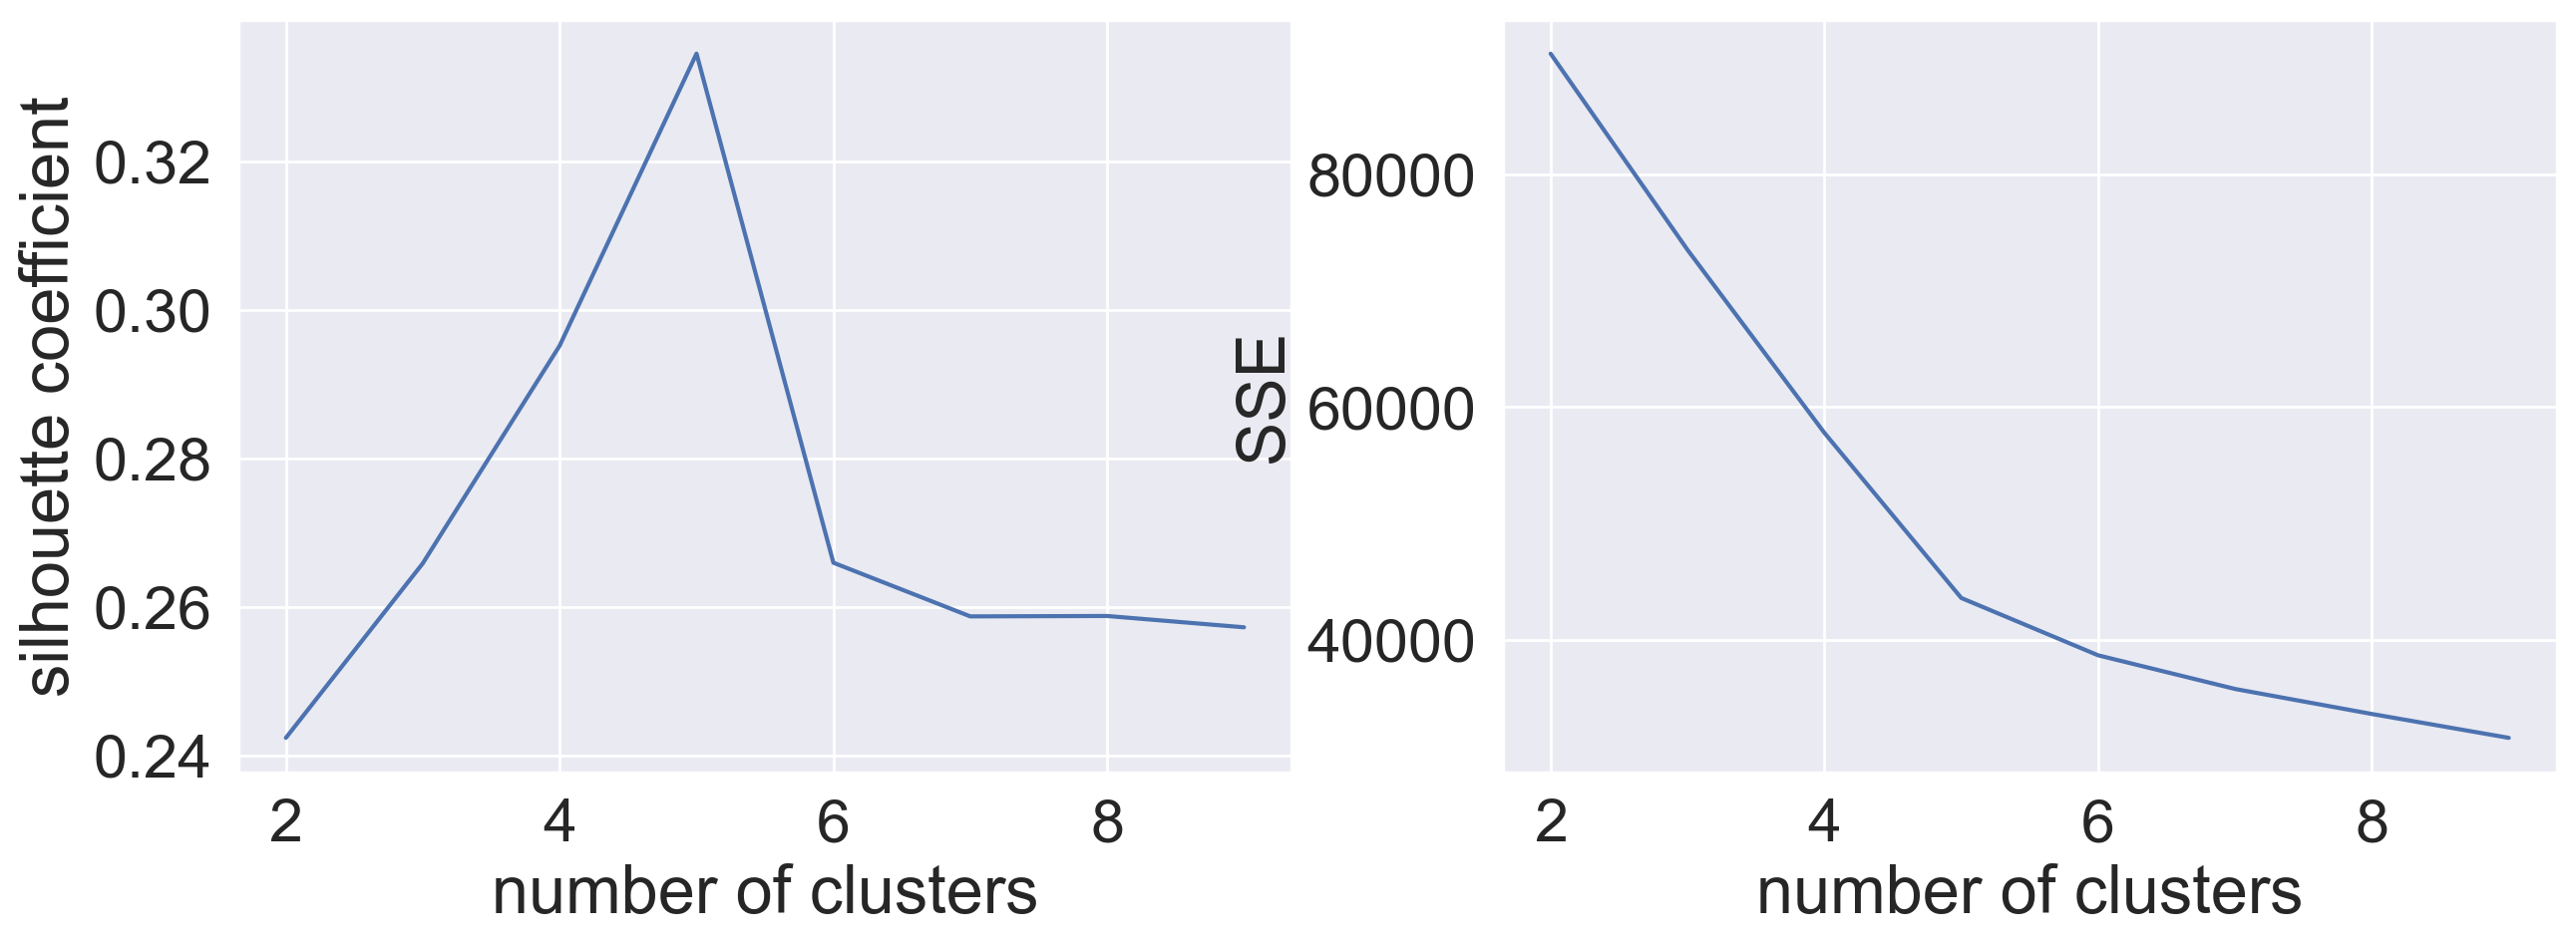

In [193]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [194]:
inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(nmf_tfidf_data_scaled)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

# clusters:  2   Inertia: 90340.393971
# clusters:  3   Inertia: 73482.435232
# clusters:  4   Inertia: 57759.568145
# clusters:  5   Inertia: 43570.098491
# clusters:  6   Inertia: 38643.199525
# clusters:  7   Inertia: 35751.132429
# clusters:  8   Inertia: 33599.519263
# clusters:  9   Inertia: 31551.116988
# clusters: 10   Inertia: 29611.734994
# clusters: 11   Inertia: 27806.471103
# clusters: 12   Inertia: 26448.721162
# clusters: 13   Inertia: 25389.954529
# clusters: 14   Inertia: 24427.662263
# clusters: 15   Inertia: 23563.130268
# clusters: 16   Inertia: 22681.318628
# clusters: 17   Inertia: 22078.271843
# clusters: 18   Inertia: 21337.114594
# clusters: 19   Inertia: 20729.231499
# clusters: 20   Inertia: 20079.719143
# clusters: 21   Inertia: 19512.206468
# clusters: 22   Inertia: 19012.125455
# clusters: 23   Inertia: 18541.104571
# clusters: 24   Inertia: 18102.877404


Text(0, 0.5, 'inertia scores')

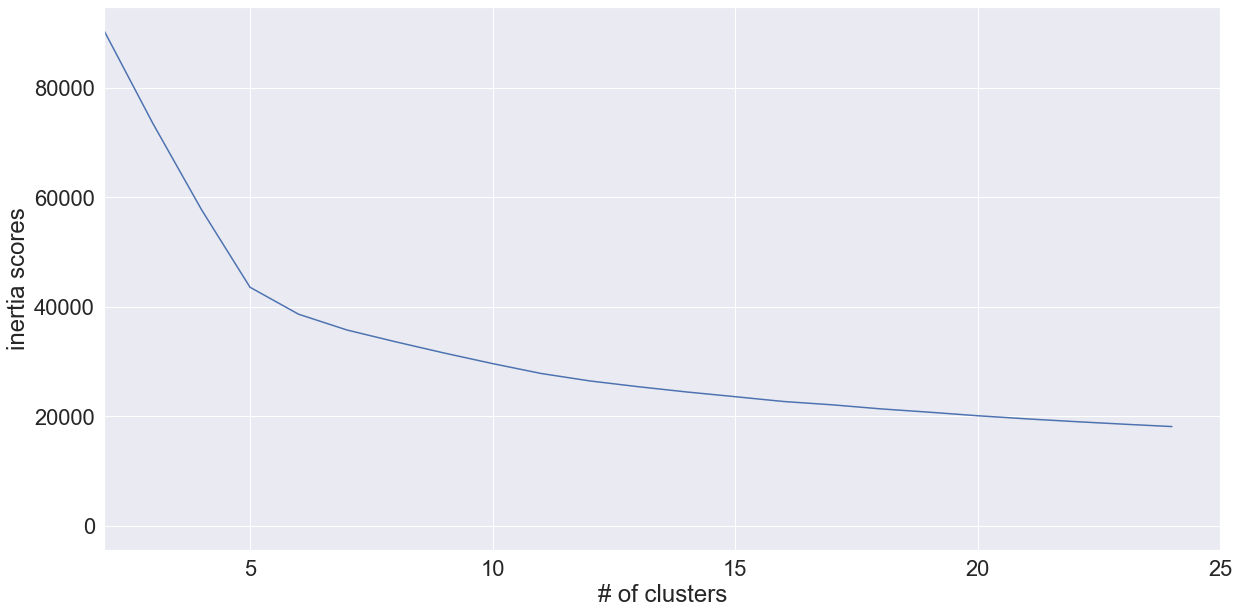

In [195]:
plt.figure(figsize=(20,10))
plt.plot(inertia)
plt.xlabel('# of clusters')
plt.xlim((2,25))
plt.ylabel('inertia scores')
#plt.ylim((650,1200))

In [196]:
# running cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(nmf_tfidf_data_scaled)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['able try', 'absolutely', 'able wear', 'absolute', 'able']
cluster1:
['absolute', 'able wear', 'absolutely', 'able try', 'able']
cluster2:
['absolutely', 'absolute', 'able wear', 'able try', 'able']
cluster3:
['able', 'absolutely', 'able wear', 'absolute', 'able try']
cluster4:
['able wear', 'able try', 'absolutely', 'absolute', 'able']


[t-SNE] Computing 277 nearest neighbors...
[t-SNE] Indexed 20628 samples in 0.107s...
[t-SNE] Computed neighbors for 20628 samples in 2.576s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20628
[t-SNE] Computed conditional probabilities for sample 2000 / 20628
[t-SNE] Computed conditional probabilities for sample 3000 / 20628
[t-SNE] Computed conditional probabilities for sample 4000 / 20628
[t-SNE] Computed conditional probabilities for sample 5000 / 20628
[t-SNE] Computed conditional probabilities for sample 6000 / 20628
[t-SNE] Computed conditional probabilities for sample 7000 / 20628
[t-SNE] Computed conditional probabilities for sample 8000 / 20628
[t-SNE] Computed conditional probabilities for sample 9000 / 20628
[t-SNE] Computed conditional probabilities for sample 10000 / 20628
[t-SNE] Computed conditional probabilities for sample 11000 / 20628
[t-SNE] Computed conditional probabilities for sample 12000 / 20628
[t-SNE] Computed conditional probabilities for sa

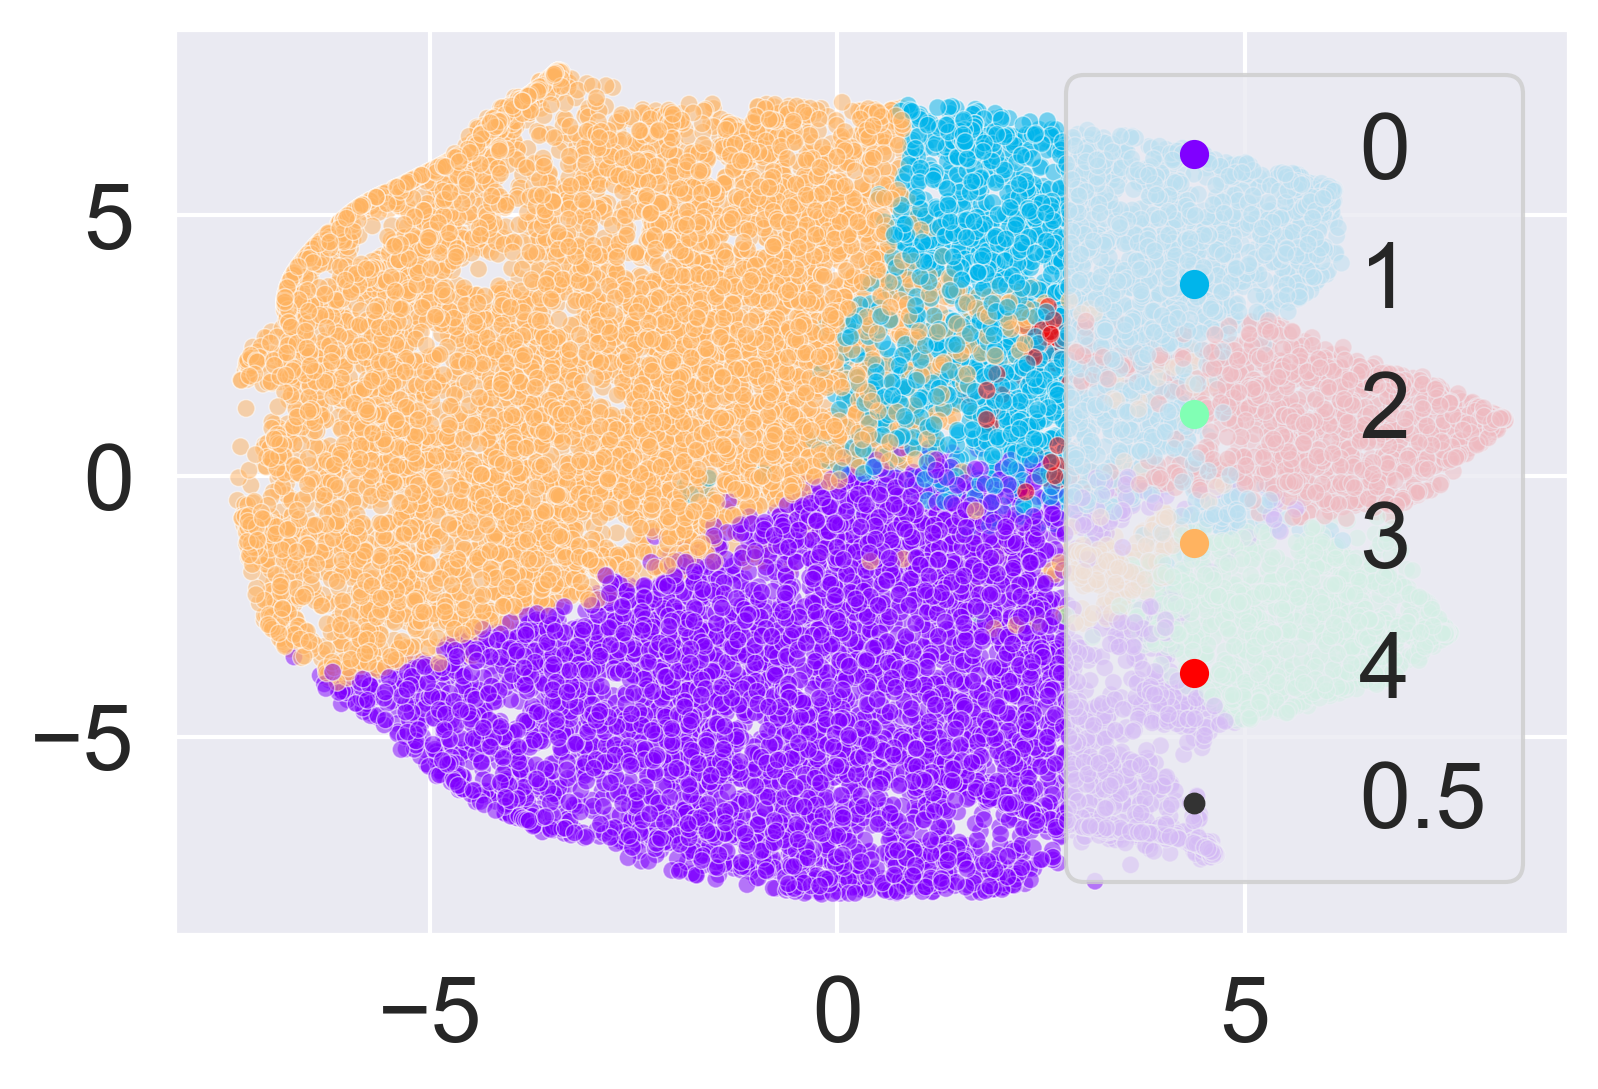

In [197]:
tsne = TSNE(n_components=2, verbose=1, perplexity=92, n_iter=300, random_state=42)
X_ne = tsne.fit_transform(nmf_tfidf_data_scaled[2000:])

figsize=(20,15)
plt.figure(dpi=300)
sns.scatterplot(X_ne[:, 0], X_ne[:, 1], hue=kmeans.labels_[2000:], alpha=0.5, size = 0.5, palette='rainbow', legend='full');

In [198]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==0]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

0 Absolutely wonderful - silky and sexy and comfortable


3 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


17 Took a chance on this blouse and so glad i did. i wasn't crazy about how the blouse is photographed on the model. i paired it whit white pants and it worked perfectly. crisp and clean is how i would describe it. launders well. fits great. drape is perfect. wear tucked in or out - can't go wrong.


18 A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a dressier outfit.  i am 5' 5'', about 135 and the small fits great.


19 I love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year's eve. i'm small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too.




After we identified how many clusters are the best, you can print out the documents that are the closest to the centroid of each clusters for examinations.

In [199]:
indices_max = [index for index, value in enumerate(kmeans.labels_) if value==3]
for rev_index in indices_max[:5]:
    print(rev_index, str(df.ReviewText[rev_index]))
    print("\n")

1 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


5 I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.


6 I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and 

## Classification of Reviews

Another thing we can try to separate the good or bad reviews from analyzing the text data is to perform a classification problem.

## Read the cleaned data from EDA

In [200]:
df = pd.read_pickle('cleaned_df.pkl')
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  
0  Intimates   Absolutely wonderful - silky and sexy and com...  
1    Dresses   Love this dress!  it's sooo pretty.  i happen...  
2    Dresses  Some major design flaws I had such high hopes ...  
3      Pants  My favorite buy! I love, love, love this jumps...  
4    Blouses  Flattering shirt This shirt is very flattering...

In our data, we have a feature named Rating which is a rating score that a customer give to the product, while 1 is the least satisfied and 5 is the most satisfied.

We can set the Rating column as our target variable and our engineered CombinedText column as independent variable to see if we could build a classifier to automatically classify a comment.

First thing I did was to group rank 1 to 4 together as bad review (labelled as 1), while rank 5 is our good review (labelled as 5). The two classes are not totally balance but they are in the acceptable range. I built classification models with naivesbayes and logistic classifiers.

## Understand what are the distribution of each rank

## Histogram of Review Ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

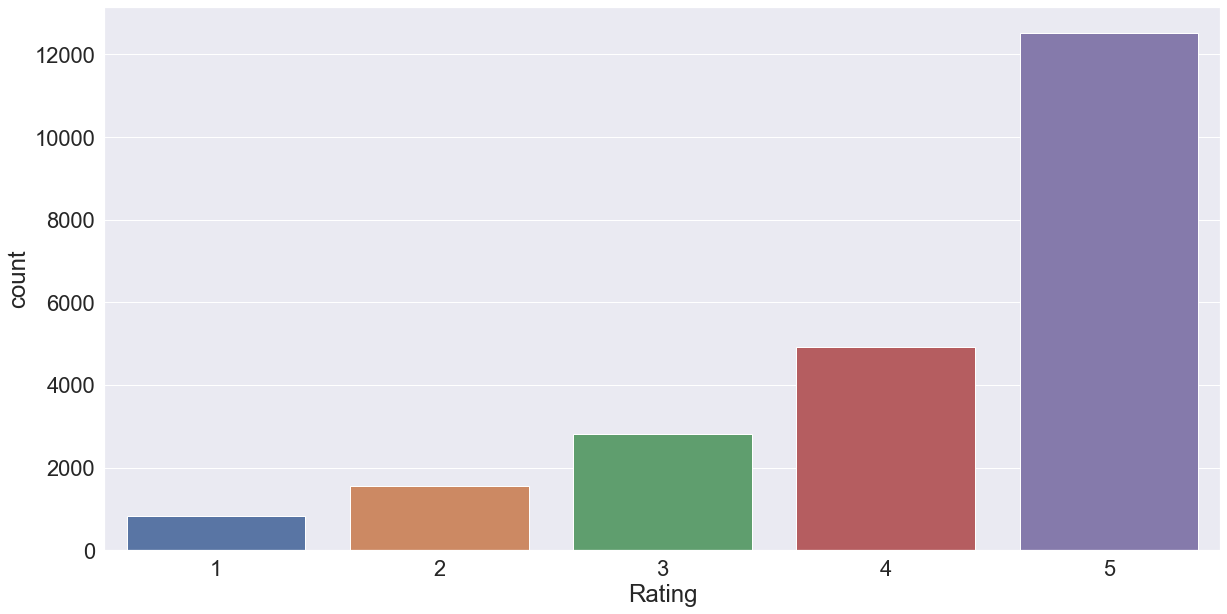

In [201]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.countplot(df.Rating)

## Perform more cleaning

In [202]:
words_to_remove = ['love', 'dress', 'dresses', 'zip', 'zipper', 'fit', 'zippers', 'young', 'younger', 'pants', 'years']
text = 'I love things about dresses but not dress.'

import re
pattern = [f'(\\b{word}\\b)' for word in words_to_remove]
pattern = '|'.join(pattern)
re.sub(pattern, '', text)

'I  things about  but not .'

In [203]:
df['ReviewTextLower'] = df.ReviewText

In [204]:
df['ReviewTextLower'] = df.ReviewTextLower.str.lower()

In [205]:
df['ReviewTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [206]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  
0  absolutely wonderful - silky and sexy and comf...  
1   this !  it's sooo pretty.  i happened to find...  
2  i had such high hopes for this  and really wan...  
3  i , ,  this jumpsuit. it's fun, flirty, and fa...  
4  this shirt is very flattering to all due to th...

## Group different ranks together as my target rank

## Histogram of Bad vs Good Review Counts

In [207]:
df['ModifiedRating'] = df.Rating.replace([2, 3, 4], 1)

<AxesSubplot:xlabel='ModifiedRating', ylabel='count'>

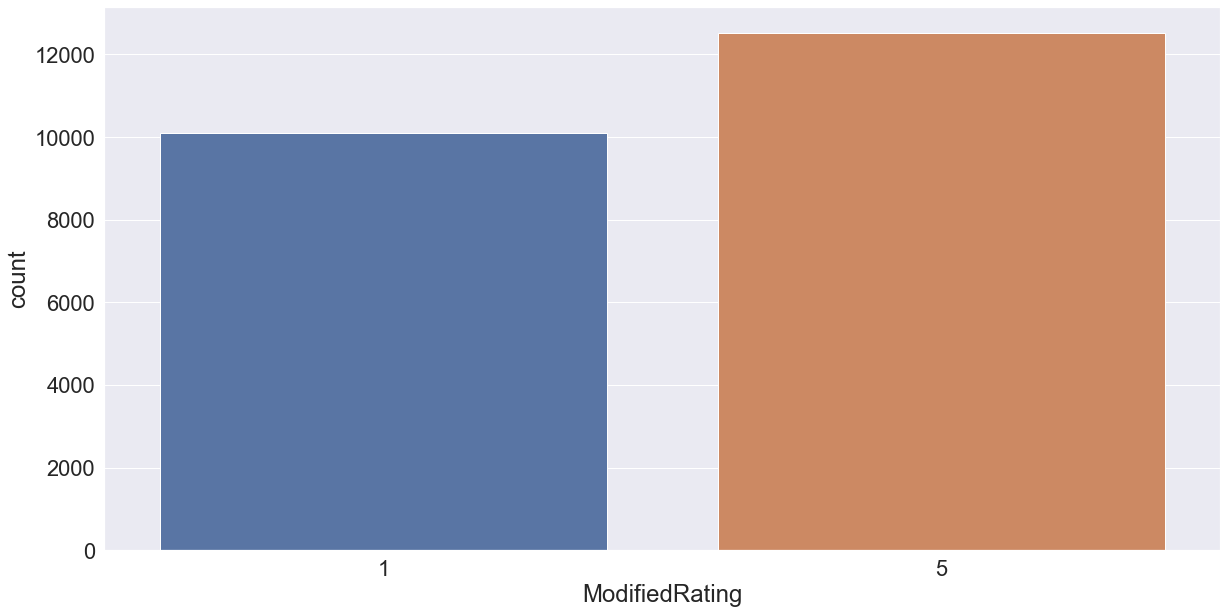

In [208]:
sns.set(font_scale = 2)
plt.figure(figsize=(20,10))
sns.countplot(df.ModifiedRating)

In [209]:
len(df[df.ModifiedRating == 1])

10101

In [210]:
len(df[df.ModifiedRating == 5])

12527

Two classes are not too imbalance and is in a safe range.

## Build different classification models

#### Using ReviewTextLower column

In [211]:
# using ReviewTextLower column as my predictors
# using ModifiedRating column as my target variable
X = df['ReviewTextLower']
y = df['ModifiedRating']

In [212]:
# vectorization
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

# transform my predictors
cv_data = count_vectorizer.fit_transform(X)
tfidf_data = tfidf_vectorizer.fit_transform(X)

In [213]:
len(count_vectorizer.vocabulary_)

254500

In [214]:
# split my data to 70/30 
X_train, X_test, y_train, y_test = train_test_split(cv_data, y, test_size=0.3, random_state=42)

In [215]:
# train with multinomail Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [216]:
# make prediction
y_pred = nb.predict(X_test)

In [217]:
# print out confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2129  896]
 [ 462 3302]]


              precision    recall  f1-score   support

           1       0.82      0.70      0.76      3025
           5       0.79      0.88      0.83      3764

    accuracy                           0.80      6789
   macro avg       0.80      0.79      0.79      6789
weighted avg       0.80      0.80      0.80      6789



In [218]:
# trying to make a prediction using this review
# this is an example for positive review
positive_example = df['ReviewTextLower'][1]
positive_example

' this !  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i  the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [219]:
# vectorize the positive_example
positive_example_vec = count_vectorizer.transform([positive_example])
# make prediction
nb.predict(positive_example_vec)[0]

5

In [220]:
# trying to make a prediction using an negative review
negative_example = df['ReviewTextLower'][5]
negative_example

'i  tracy reese , but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this  was very pretty out of the package but its a lot of . the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i  the color and the idea of the style but it just did not work on me. i returned this .'

In [221]:
negative_example_vec = count_vectorizer.transform([negative_example])
nb.predict(negative_example_vec)[0]

1

In [222]:
negative_example = df['ReviewTextLower'][10]
negative_example

' runs small esp where the  area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas  this year! needless to say it will be going back.'

In [223]:
negative_example_vec = count_vectorizer.transform([negative_example])
nb.predict(negative_example_vec)[0]

1

#### Using Combinetext column

In [224]:
df['CombinedTextLower'] = df.CombinedText

In [225]:
df['CombinedTextLower'] = df.CombinedTextLower.str.lower()

In [226]:
df['CombinedTextLower'].replace(to_replace=pattern, value='', regex=True, inplace=True)

In [227]:
X = df.CombinedTextLower
y = df.ModifiedRating

In [228]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(X)
tfidf_data = tfidf_vectorizer.fit_transform(X)

In [229]:
len(count_vectorizer.vocabulary_)

267875

In [230]:
X_train, X_test, y_train, y_test = train_test_split(cv_data, y, test_size=0.3, random_state=42)

In [231]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [232]:
y_pred = nb.predict(X_test)

In [233]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2177  848]
 [ 424 3340]]


              precision    recall  f1-score   support

           1       0.84      0.72      0.77      3025
           5       0.80      0.89      0.84      3764

    accuracy                           0.81      6789
   macro avg       0.82      0.80      0.81      6789
weighted avg       0.82      0.81      0.81      6789



In [234]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [235]:
y_pred = logit.predict(X_test)

In [236]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2248  777]
 [ 554 3210]]


              precision    recall  f1-score   support

           1       0.80      0.74      0.77      3025
           5       0.81      0.85      0.83      3764

    accuracy                           0.80      6789
   macro avg       0.80      0.80      0.80      6789
weighted avg       0.80      0.80      0.80      6789



In [237]:
df.ReviewText[23]

"Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."

In [238]:
df.ReviewText[14]

'This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the zip'

In [239]:
df['ReviewText'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [240]:
positive_example = df['CombinedTextLower'][1]
positive_example

'  this !  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i  the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [241]:
positive_example_vec = count_vectorizer.transform([positive_example])
logit.predict(positive_example_vec)[0]

5

In [242]:
df['ReviewText'][5]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [243]:
negative_example=df['ReviewTextLower'][5]
negative_example

'i  tracy reese , but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this  was very pretty out of the package but its a lot of . the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i  the color and the idea of the style but it just did not work on me. i returned this .'

In [244]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [245]:
negative_example=df['ReviewTextLower'][10]
negative_example

' runs small esp where the  area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas  this year! needless to say it will be going back.'

In [246]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [247]:
df.ReviewText[23484]

"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!"

In [248]:
negative_example=df['ReviewTextLower'][23484]
negative_example

"i bought this  for a wedding i have this summer, and it's so cute. unfortunately the  isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this  was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!"

In [249]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [250]:
df.ReviewText[23478]

'I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.'

In [251]:
negative_example=df['ReviewTextLower'][23478]
negative_example

'i was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.'

In [252]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

In [253]:
negative_example=df['ReviewTextLower'][14]
negative_example

'this is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small  me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this  is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the '

In [254]:
negative_example_vec = count_vectorizer.transform([negative_example])
logit.predict(negative_example_vec)[0]

1

# predicting recommend or not

<AxesSubplot:xlabel='RecommendedIND', ylabel='count'>

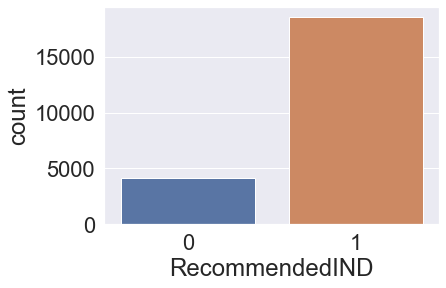

In [255]:
sns.countplot(df.RecommendedIND)

In [256]:
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  \
0  Intimates   Absolutely wonderful - silky and sexy and com...   
1    Dresses   Love this dress!  it's sooo pretty.  i happen...   
2    Dresses  Some major design flaws I had such high hopes ...   
3      Pants  My favorite buy! I love, love, love this jumps...   
4    Blouses  Flattering shirt This shirt is very flattering...   

                                     ReviewTextLower  ModifiedRating  \
0  absolutely wonderful - silky and sexy and comf...               1   
1   this !  it's sooo pretty.  i happened to find...               5   
2  i had such high hopes for this  and really wan...               1   
3  i , ,  this jumpsuit. it's fun, flirty, and fa...               5   
4  this shirt is very flattering to all due to th...               5   

                                   CombinedTextLower  
0   absolutely wonderful - silky and sexy and com...  
1    this !  it's sooo pretty.  i happened to fin...  
2  some major design flaws i had such high hopes ...  
3  my favorite buy! i , ,  this jumpsuit. it's fu...  
4  flattering shirt this shirt is very flattering...

In [257]:
#rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
X = df.CombinedTextLower
y = df.RecommendedIND

In [258]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

cv_data = count_vectorizer.fit_transform(X)
tfidf_data = tfidf_vectorizer.fit_transform(X)

In [259]:
len(count_vectorizer.vocabulary_)

267875

In [260]:
X_train, X_test, y_train, y_test = train_test_split(cv_data, y, test_size=0.3, random_state=42, stratify=y)

In [261]:
# using SMOTE to oversample
from imblearn.over_sampling import SMOTE
 
sm = SMOTE(random_state=42)
X_train_smoted, y_train_smoted = sm.fit_resample(X_train, y_train)



In [262]:
print(Counter(y_train_smoted))

Counter({1: 12968, 0: 12968})


In [263]:
nb = MultinomialNB()
nb.fit(X_train_smoted, y_train_smoted)

MultinomialNB()

In [264]:
y_pred = nb.predict(X_test)

In [265]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 753  477]
 [ 263 5296]]


              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1230
           1       0.92      0.95      0.93      5559

    accuracy                           0.89      6789
   macro avg       0.83      0.78      0.80      6789
weighted avg       0.89      0.89      0.89      6789



In [266]:
logit = LogisticRegression()
logit.fit(X_train_smoted, y_train_smoted)

LogisticRegression()

In [267]:
y_pred = logit.predict(X_test)

In [268]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 829  401]
 [ 490 5069]]


              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1230
           1       0.93      0.91      0.92      5559

    accuracy                           0.87      6789
   macro avg       0.78      0.79      0.78      6789
weighted avg       0.87      0.87      0.87      6789



## Recall Scores for both bad (rank 1) and good (rank 5) reviews
The metric that I used for model evaluation, I used recall score because I care the cases when I predicted the review is good review but actually it is not. The best recall score that I got is 0.74 without a lot of engineering. The score could be better if there is more time and exploration on the model.

# Ranking of Products

In [17]:
import pandas as pd

In [18]:
df = pd.read_pickle('cleaned_df.pkl')
df.head()

Age                                         ReviewText  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   RecommendedIND  PositiveFeedbackCount    DivisionName DepartmentName  \
0               1                      0       Initmates       Intimate   
1               1                      4         General        Dresses   
2               0                      0         General        Dresses   
3               1                      0  General Petite        Bottoms   
4               1                      6         General           Tops   

   ClassName                                       CombinedText  
0  Intimates   Absolutely wonderful - silky and sexy and com...  
1    Dresses   Love this dress!  it's sooo pretty.  i happen...  
2    Dresses  Some major design flaws I had such high hopes ...  
3      Pants  My favorite buy! I love, love, love this jumps...  
4    Blouses  Flattering shirt This shirt is very flattering...

### Rankings of Products by Division 

In [23]:
df_division=df[['DivisionName','Rating']]
df_division.groupby("DivisionName").mean()["Rating"].nlargest()

DivisionName
Initmates         4.275596
General Petite    4.196631
General           4.165282
Name: Rating, dtype: float64

In [26]:
df_division=df[['DivisionName','Rating']]
df_division_rank=df_division.groupby('DivisionName').mean().sort_values(by='Rating',ascending=False)
df_division_rank["Rank"]=range(1,len(df_division_rank)+1)
df_division_rank.reset_index().set_index("Rank")

DivisionName    Rating
Rank                          
1          Initmates  4.275596
2     General Petite  4.196631
3            General  4.165282

### Rankings of Products by Department

In [27]:
df_department=df[['DepartmentName','Rating']]
df_department.groupby("DepartmentName").mean()["Rating"].nlargest()

DepartmentName
Bottoms     4.278809
Intimate    4.271022
Jackets     4.254491
Tops        4.157743
Dresses     4.138812
Name: Rating, dtype: float64

In [28]:
df_department=df[['DepartmentName','Rating']]
df_department_rank=df_department.groupby('DepartmentName').mean().sort_values(by='Rating',ascending=False)
df_department_rank["Rank"]=range(1,len(df_department_rank)+1)
df_department_rank.reset_index().set_index("Rank")

DepartmentName    Rating
Rank                         
1           Bottoms  4.278809
2          Intimate  4.271022
3           Jackets  4.254491
4              Tops  4.157743
5           Dresses  4.138812
6             Trend  3.838983

### Rankings of Products by Class

In [29]:
df_class=df[['ClassName','Rating']]
df_class.groupby("ClassName").mean()["Rating"].nlargest()

ClassName
Layering    4.348485
Jeans       4.347826
Lounge      4.301943
Sleep       4.294393
Jackets     4.288433
Name: Rating, dtype: float64

In [30]:
df_class=df[['ClassName','Rating']]
df_class_rank=df_class.groupby('ClassName').mean().sort_values(by='Rating',ascending=False)
df_class_rank["Rank"]=range(1,len(df_class_rank)+1)
df_class_rank.reset_index().set_index("Rank")

ClassName    Rating
Rank                          
1           Layering  4.348485
2              Jeans  4.347826
3             Lounge  4.301943
4              Sleep  4.294393
5            Jackets  4.288433
6          Intimates  4.278912
7              Pants  4.261481
8             Shorts  4.253289
9            Legwear  4.246835
10        Fine gauge  4.237960
11            Skirts  4.229236
12         Outerwear  4.181818
13              Swim  4.171687
14          Sweaters  4.168841
15             Knits  4.145698
16           Blouses  4.142809
17           Dresses  4.138812
18    Casual bottoms  4.000000
19          Chemises  4.000000
20             Trend  3.838983

## Project Execution Understandings
* Unsupervised learning is really very different than supervised learning because of its nature.

* We will expect to spend a lot of time trying to understand how to cluster your data, there are a lot of clustering methods out there beside KMeans.

* Doing text analytics or NLP, we can expect to spend a lot of your time cleaning your text data for best results. For example, how to decide what stop words to use based on the context of your data and problem you want to solve, how to lemmatize, how to vectorize, how to reduce your dimensionality and avoid curse of dimensionality, and etc.

* Carried out rankings of products by each its respective columns lke Division, Department and Class.